In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
mean_vec1=np.array([0,0,0])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
class1=np.random.multivariate_normal(mean_vec1,cov_mat1,100)

In [5]:
mean_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2=np.random.multivariate_normal(mean_vec2,cov_mat2,100)

In [8]:
from mpl_toolkits.mplot3d import axes3d

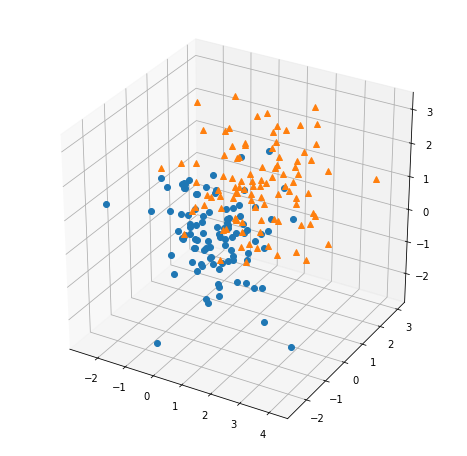

In [9]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.plot(class1[:,0],class1[:,1],class1[:,2],'o')
ax.plot(class2[:,0],class2[:,1],class2[:,2],'^')
plt.show()

In [10]:
all_data=np.concatenate((class1,class2))

In [15]:
pca=PCA(n_components=2)
reduced=pca.fit_transform(all_data)
pca.explained_variance_

array([1.66564263, 1.18273028])

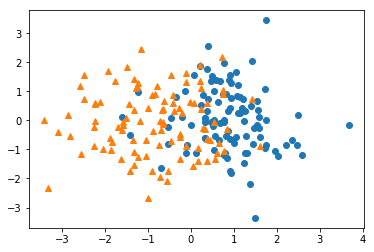

In [17]:
plt.plot(reduced[0:100,0],reduced[0:100,1],'o')
plt.plot(reduced[100:200,0],reduced[100:200,1],'^')

# manual implimentation

In [22]:
covar=np.cov(all_data.T)

In [23]:
eig_val, eig_vec=np.linalg.eig(covar)
eig_val, eig_vec

(array([1.66564263, 0.98927604, 1.18273028]),
 array([[-0.49681886, -0.6194634 , -0.60781257],
        [-0.47077147,  0.780731  , -0.41089333],
        [-0.72907149, -0.08200126,  0.67950758]]))

In [32]:
evalcompair=[]
for i in range(len(eig_val)):
    evalcompair.append([eig_val[i],eig_vec[:,i]])

In [33]:
evalcompair.sort(reverse=True)
evalcompair

[[1.6656426321533497, array([-0.49681886, -0.47077147, -0.72907149])],
 [1.1827302823597023, array([-0.60781257, -0.41089333,  0.67950758])],
 [0.9892760439033741, array([-0.6194634 ,  0.780731  , -0.08200126])]]

In [44]:
redata=np.dot(all_data,eig_vec[:,[0,2]])

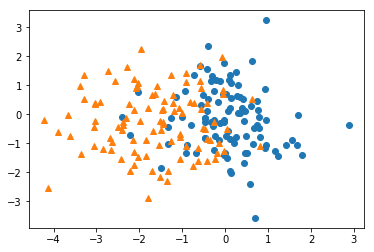

In [45]:
plt.plot(redata[0:100,0],redata[0:100,1],'o')
plt.plot(redata[100:200,0],redata[100:200,1],'^')

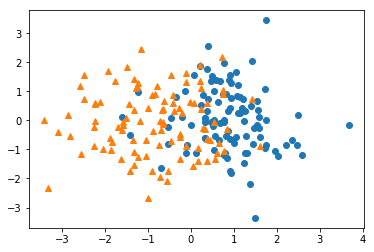

In [46]:
plt.plot(reduced[0:100,0],reduced[0:100,1],'o')
plt.plot(reduced[100:200,0],reduced[100:200,1],'^')